
# Test clouds: Ridge functions


### JAH, May 2021

In [1]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.ndimage     as ndimg

import clouds.sclouds    as sclouds
import clouds.dclouds    as dclouds
import clouds.pclouds    as plouds
import clouds.testclouds as tclouds


In [3]:
plt.rcParams['image.cmap'] = 'rainbow'

In [4]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri Jun 18 10:55:51 2021


## Test

   * Generate a 2D and 3D function with know gradient, laplacian, eigenvalues and ridge
   
   * Validate gradient, laplacian, eigenvalues, ridge
   
   * Define a Ridge filter


## Generate Function

In [5]:
fig  = lambda nx = 1, ny = 1, sz = 5 : plt.figure(figsize = (ny * sz, nx * sz))
ax3d = lambda nx = 1, ny = 1, i = 1  : plt.gcf().add_subplot(nx, ny, i, projection = '3d')
hopts = {'histtype' : 'step'}
efig = plt.tight_layout

## Generate image

In [26]:
def ana_img_smooth(img, perc = 20, discrete = False):
    
    clouds = dclouds if discrete else sclouds
    
    xmesh = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]), indexing = 'ij')

    sx = ndimg.sobel(img, axis=0, mode='constant')
    sy = ndimg.sobel(img, axis=1, mode='constant')
    sob = np.hypot(sx, sy)

    fig(2, 3)
    ax = ax3d(2, 3, 1)
    ax.plot_surface(*xmesh, img, cmap = 'rainbow');

    plt.subplot(2, 3, 2)
    plt.imshow(img);
    plt.title('img')

    plt.subplot(2, 3, 3)
    plt.imshow(sob);
    plt.title('sobel filter')
    
    grad    = sclouds.gradient(img);
    gradsph = sclouds.vector_in_spherical(grad)
    vgrad   = gradsph[0]
    
    plt.subplot(2, 3, 4)
    plt.imshow(vgrad, alpha = 1.)
    plt.title('grad filter')

    mask = img > 0
    plt.subplot(2, 3, 5)
    sel, l = sclouds.edge_filter(img, perc = perc, mask = mask)
    plt.imshow(img, alpha = 0.2)
    plt.imshow(sel, alpha = 0.5, cmap = 'binary')
    plt.title('edge filter')
    
    plt.subplot(2, 3, 6)
    sel, l = sclouds.ridge_filter(img, perc = perc, mask = mask)
    plt.imshow(img, alpha = 0.3, cmap = 'rainbow')
    plt.imshow(sel, alpha = 0.5, cmap = 'binary')
    plt.title('ridge filter')        
    

In [54]:
def ana_img_discrete(img):
    
    fig(2, 2)
    plt.subplot(2, 2, 1)
    plt.imshow(img, origin = 'lower');
    plt.title('img')

    egrad, edir  = dclouds.gradient(img)
    plt.subplot(2, 2, 2)
    plt.imshow(egrad, origin = 'lower');
    plt.title('gradient')

    plt.subplot(2, 2, 3)
    edge               = dclouds.edge_filter(img)
    plt.imshow(edge, origin = 'lower');

    plt.subplot(2, 2, 4)
    ridge               = dclouds.ridge_filter(img)
    plt.imshow(ridge, origin = 'lower');
    plt.title('ridge filter')
    
    efig();

In [55]:
img = 1 + tclouds.generate_rectange()

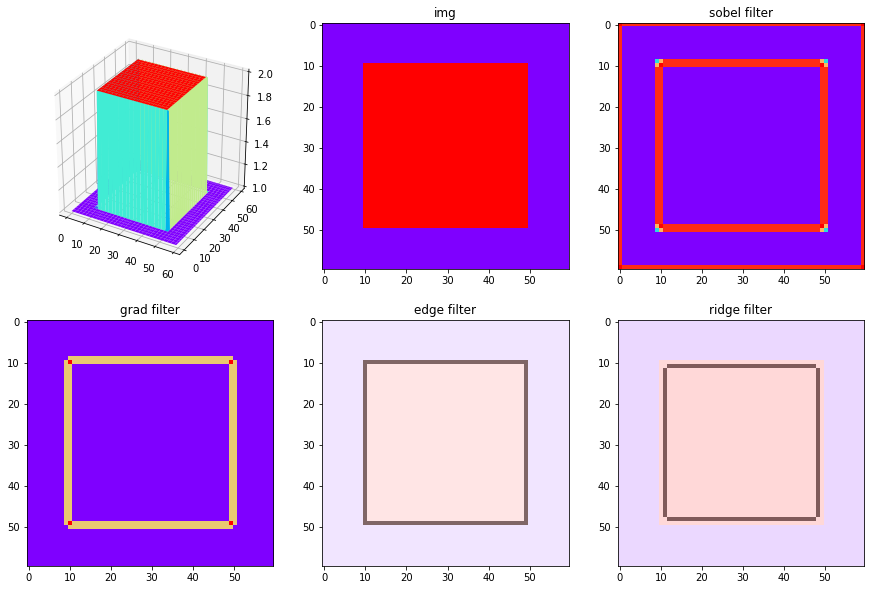

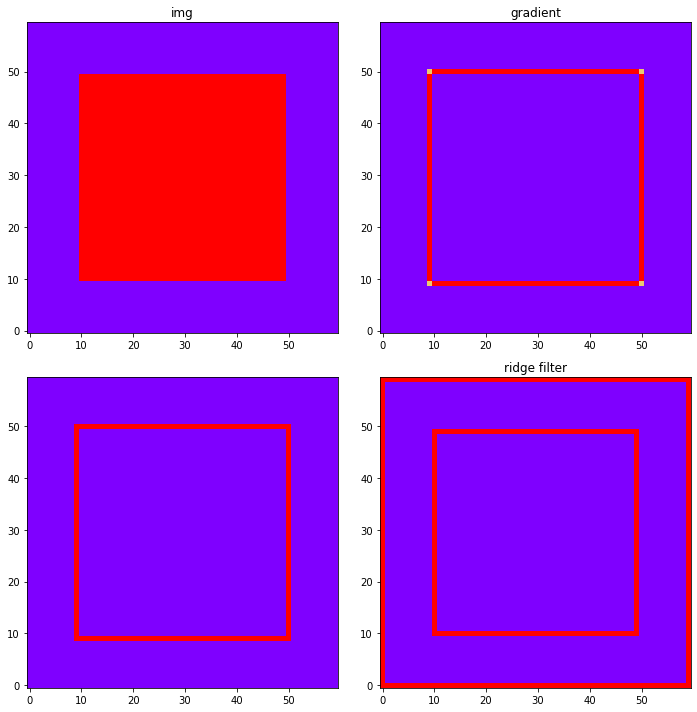

In [56]:
ana_img_smooth  (img);
ana_img_discrete(img);

In [65]:
img = 1 + tclouds.generate_rectange(20, 10, sigma = 0.5)

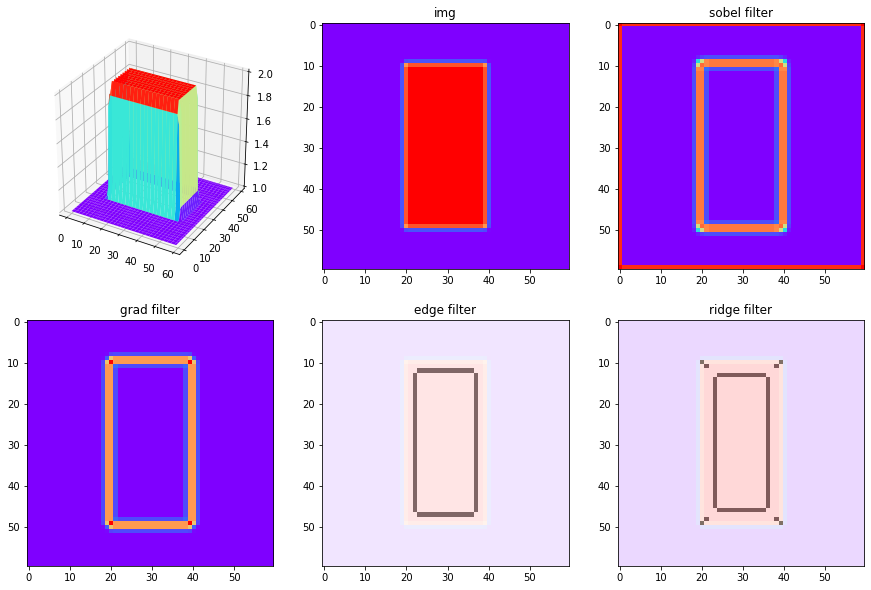

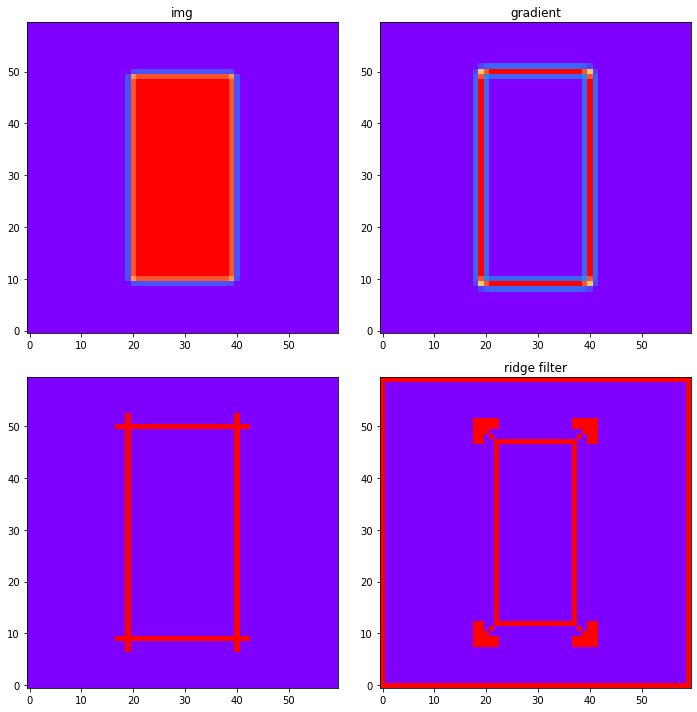

In [66]:
ana_img_smooth  (img);
ana_img_discrete(img);

**Conclusions:**

   * Edge and Ridge filter computes mathematically the correct answer
   
   * But now, if we want to know the edge before the smearing?
   
   